In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt


%pylab inline

import os
from scipy.misc import imread
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from __future__ import print_function
from keras.datasets import mnist

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import keras


Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [2]:
root_dir = os.path.abspath('../..')

# check for existence
print(os.path.exists(root_dir))
print(root_dir)



data_dir = os.path.join(root_dir,'Analytics Vidya Identify the digits','Identify the Digits')
print(os.path.exists(data_dir))
print(data_dir)

sub_dir = os.path.join(data_dir,'sub') 
print(os.path.exists(sub_dir))
print(sub_dir)

True
C:\Users\Dinesh\Desktop\Deep-Learning-with-keras\2_Deep_Learning_With_Convolution_Networks
True
C:\Users\Dinesh\Desktop\Deep-Learning-with-keras\2_Deep_Learning_With_Convolution_Networks\Analytics Vidya Identify the digits\Identify the Digits
True
C:\Users\Dinesh\Desktop\Deep-Learning-with-keras\2_Deep_Learning_With_Convolution_Networks\Analytics Vidya Identify the digits\Identify the Digits\sub


In [3]:

# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

In [4]:
train = pd.read_csv(os.path.join(data_dir,'data','Train', 'train.csv')) # filename,labels
train.head(n=5)

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [5]:
train.label.values

array([4, 9, 1, ..., 9, 3, 0], dtype=int64)

In [6]:
train.label

0        4
1        9
2        1
3        7
4        3
5        9
6        4
7        9
8        3
9        4
10       2
11       3
12       6
13       6
14       0
15       4
16       8
17       7
18       9
19       5
20       3
21       9
22       1
23       9
24       6
25       8
26       9
27       5
28       7
29       3
        ..
48970    7
48971    5
48972    0
48973    1
48974    4
48975    1
48976    7
48977    5
48978    6
48979    5
48980    6
48981    3
48982    5
48983    5
48984    9
48985    2
48986    9
48987    0
48988    0
48989    7
48990    0
48991    1
48992    1
48993    6
48994    9
48995    2
48996    4
48997    9
48998    3
48999    0
Name: label, Length: 49000, dtype: int64

In [7]:
test = pd.read_csv(os.path.join('test.csv')) # filename
test.head(n=5)

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png


In [8]:
sample_submission = pd.read_csv(os.path.join('Sample_Submission.csv')) # sample submission file

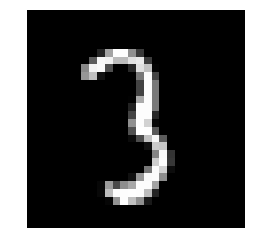

In [9]:
img_name = rng.choice(train.filename)
filepath = os.path.join(data_dir,'data', 'Train', 'Images', 'train', img_name)

img = imread(filepath, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [10]:

temp = []
for img_name in train.filename:
    image_path = os.path.join(data_dir,'data',  'Train', 'Images', 'train', img_name)
    img = imread(image_path, flatten=True)
    img = img
    temp.append(img)
    
train_x = np.stack(temp)


In [11]:
train_x /= 255.0 
print(train_x.shape)

(49000, 28, 28)


In [12]:

# train_x = train_x.reshape(-1, 784).astype('float32')

temp = []
for img_name in test.filename:
    image_path = os.path.join(data_dir,'data',  'Train', 'Images', 'test', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

test_x /= 255.0
# test_x = test_x.reshape(-1, 784).astype('float32')

In [13]:
print(test_x.shape)

(21000, 28, 28)


In [14]:
train_x = train_x[:, np.newaxis, :, :]
test_x = test_x[:,np.newaxis,:,:]

print(train_x.shape)
print(test_x.shape)

(49000, 1, 28, 28)
(21000, 1, 28, 28)


In [15]:
K.set_image_dim_ordering("th")

In [16]:

#  Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])

train_y = np_utils.to_categorical(train.label.values) #labels

In [17]:
# network and training
NB_EPOCH = 100
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10 # number of outputs = number of digits
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)


In [20]:
#define the ConvNet
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential() # Sequential model
     
        # CONV => RELU => POOL
        
        model.add(Conv2D(20, kernel_size=5, padding="same",input_shape=input_shape))
        # 20 ->  Convolutional kernel
        # kernel_size = 5 --> Specify the value of spatial dimensions.
        # padding ='same' --> We have an output same size as the input.
        # input_shape --> input shape of the image
        
        model.add(Activation("relu"))
        # Activation --> Relu
        model.add(Conv2D(50, kernel_size=5, border_mode="same", activation='relu'))
        
        
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # pool_size = (2,2) --> Represents factors in which the image is vertically and horizontally downscaled.
        model.add(Dropout(0.25))
        
       
        # CONV => RELU => POOL
        model.add(Conv2D(50, kernel_size=5, border_mode="same"))
        model.add(Activation("relu"))
        model.add(Conv2D(50, kernel_size=5, border_mode="same",activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(Dropout(0.25))
        
        model.add(Conv2D(50, kernel_size=5, border_mode="same"))
        model.add(Activation("relu"))
        model.add(Conv2D(50, kernel_size=5,border_mode="same", activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(Dropout(0.25))
        
        
        # Flatten => RELU layers   
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        model.add(Dropout(0.5))
        
        # a softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model

In [21]:
# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
metrics=["accuracy"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, kernel_size=5, activation="relu", padding="same")`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, kernel_size=5, padding="same")`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, kernel_size=5, activation="relu", padding="same")`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, kernel_size=5, padding="same")`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, kernel_size=5, activation="relu", padding="same")`


In [ ]:
history = model.fit(train_x, train_y,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 39200 samples, validate on 9800 samples
Epoch 1/100
39200/39200 [==============================] - 1340s 34ms/step - loss: 0.3637 - acc: 0.8786 - val_loss: 0.0765 - val_acc: 0.9766
Epoch 2/100
39200/39200 [==============================] - 1904s 49ms/step - loss: 0.0799 - acc: 0.9767 - val_loss: 0.0466 - val_acc: 0.9854
Epoch 3/100
39200/39200 [==============================] - 1908s 49ms/step - loss: 0.0620 - acc: 0.9817 - val_loss: 0.0458 - val_acc: 0.9862
Epoch 4/100
39200/39200 [==============================] - 2091s 53ms/step - loss: 0.0472 - acc: 0.9852 - val_loss: 0.0410 - val_acc: 0.9887
Epoch 5/100
39200/39200 [==============================] - 2021s 52ms/step - loss: 0.0405 - acc: 0.9882 - val_loss: 0.0344 - val_acc: 0.9905
Epoch 6/100
39200/39200 [==============================] - 2098s 54ms/step - loss: 0.0337 - acc: 0.9902 - val_loss: 0.0352 - val_acc: 0.9911
Epoch 7/100
39200/39200 [==============================] - 1924s 49ms/step - loss: 0.0284 - acc: 0.9914 -

In [ ]:
pred = model.predict_classes(test_x)
sample_submission.filename = test.filename; sample_submission.label = pred
sample_submission.to_csv(os.path.join(sub_dir, 'fianl_prediction.csv'), index=False)